## The Little Astronomy: Week 4 Work

## First Steps

In [66]:
import gzip            # can uncompress gzipped files, useful for accessing the pleiades data
import io              # useful routines for input/output
import numpy as np
import pandas as pd    # for working with "rows/columns" oriented data
import pymysql.cursors # 
import sqlite3         # an SQL database
import urllib.request  # for loading documents using http

# Connect to the database
connection = pymysql.connect(host='hosting.nyu.edu',
                             user='cmrougha_adsq',
                             password='####REPLACE####',
                             db='cmrougha_adsq2017',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

## Data Input (Manual and Automated)

### The Virtual International Authority File

The dataset for this project on the Little Astronomy already incorporated outside identifiers in the form of the ID numbers each manuscript possessed on the Pinakes digital catalog. It was desirable to incorporate further outside identifiers so that the project could better interact with outside data. The outside data chosen is that of the Virtual International Authority File (<https://viaf.org/>).

From this database, identifiers were drawn to be linked to the libraries, works, and authors appearing in the Little Astronomy dataset.

### Century Information

As the data has been extracted from the Pinakes database, each text in a manuscript is associated with information on the century to which it has been dated. (The link is between date and text rather than date and manuscript because in some cases manuscripts are rebound compilations of texts copied out at different times.)

It is desirable to be able to query this date information as numerical data, but this is presently complicated by the fact that the Pinakes database sometimes specifies a subset of a century (e.g. "16 med.") or a span of centuries (e.g. "12-13"). The website (<http://pinakes.irht.cnrs.fr/mode-d-emploi.html>) offers the following information:

> ● 14-15 : 14e ou 15e siècle
> 
> ● 14, 16 : partie ancienne du 14e siècle, et partie substantielle restaurée au 16e siècle (les restaurations mineures n’étant généralement pas mentionnées)
> 
> ● 11 in., 11 med., 11 ex. : début, milieu, ou fin du 11e siècle
> 
> ● 11 (1/2) : première moitié du 11e siècle
> 
> ● 09 (3/4) : troisième quart du 9e siècle
> 
> ● 1285-1289 : entre 1285 et 1289
> 
> ● 1400 ca., ante, post : autour de, avant ou après 1400.

For this project's database, I preserved the original information from Pinakes but also chose to add columns where the date information was presented numerically. Pinakes does not provide an exact numerical translation of the above, so in the project these written descriptions were translated according to the following guidelines from the MASTER standard (discussed in this DigiPal blog post: <http://www.digipal.eu/blog/the-problem-of-digital-dating-part-i/>):

<table><tr><td>Formula</td><td>Interpretation</td></tr>
<tr><td>Circa 1400</td><td>1390×1410</td></tr>
<tr><td>Saec. xv</td><td>1400×1499</td></tr>
<tr><td>Saec. xv in.</td><td>1400×1415</td></tr>
<tr><td>Saec. xv<sup>1/4</sup></td><td>1400×1425</td></tr>
<tr><td>Saec. xv<sup>1</sup></td><td>1400×1450</td></tr>
<tr><td>Saec. xv<sup>2/4</sup></td><td>1425×1450</td></tr>
<tr><td>Saec. xv med.</td><td>1440×1460</td></tr>
<tr><td>Saec. xv<sup>3/4</sup></td><td>1450×1475</td></tr>
<tr><td>Saec. xv<sup>4/4</sup></td><td>1475×1499</td></tr>
<tr><td>Saec. xv ex.</td><td>1485×1499</td></tr></table>

The cited post outlines alternative standards as well and points out some of the issues. Hopefully so long as the user of the database is aware of how date information has been recorded these issues can be minimalized.

In [20]:
# The first run deals with the simplest situation: a century identified
# with a single number with no noted narrower range.

pd.read_sql("""
SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(`pinakes_century`,'00') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(`pinakes_century`,'00') AS DECIMAL(4,0)) - 1 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century NOT LIKE '%.%'
 AND pinakes_century NOT LIKE '%/%'
""", connection)

# For some unknown reason, CAST(something AS INT) refuses to work properly.

,shelfmark_id,shelfmark_name-short,text_id,pinakes_century,num_dateEarly,num_dateLate
0,Ricc.38,Biblioteca Riccardiana fonds principal 38,text_A,16,1500.0,1599.0
1,Par.gr.2342,Bibliothèque nationale de France (BNF) gr. 2342,text_A,14,1300.0,1399.0
2,Siena.L.X.56,Biblioteca comunale degli Intronati fonds prin...,text_A,16,1500.0,1599.0
3,Par.gr.2364,Bibliothèque nationale de France (BNF) gr. 2364,text_A,15,1400.0,1499.0
4,Leiden.Voss.47,Bibliotheek der Rijksuniversiteit Voss. Misc. 47,text_A,17,1600.0,1699.0
5,Magl.II.III.36,Biblioteca Nazionale Centrale Magl. Magliabecc...,text_A,16,1500.0,1599.0
6,Vat.gr.202,Biblioteca Apostolica Vaticana Vat. gr. 202,text_A,13,1200.0,1299.0
7,Par.gr.2363,Bibliothèque nationale de France (BNF) gr. 2363,text_A,15,1400.0,1499.0
8,Trinity.O.5.15,Trinity College fonds principal O.05.15 (1296),text_A,17,1600.0,1699.0
9,Ambr.I84inf.,Biblioteca Ambrosiana fonds principal I 084 in...,text_A,16,1500.0,1599.0


In [21]:
# The following shows one of the queries used for the other cases, and
# a similar pattern was followed for the rest of the single-century dates.

pd.read_sql("""
SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(REPLACE(`pinakes_century`, ' med.', ''),'40') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(REPLACE(`pinakes_century`, ' med.', ''),'60') AS DECIMAL(4,0)) - 100 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century LIKE '%med%'
""", connection)

,shelfmark_id,shelfmark_name-short,text_id,pinakes_century,num_dateEarly,num_dateLate
0,Marc.gr.304,Biblioteca Nazionale Marciana gr. Z. 304 (coll...,text_A,15 med.,1440.0,1460.0
1,Vat.Ross.978,Biblioteca Apostolica Vaticana Ross. 978,text_A,16 med.,1540.0,1560.0
2,Par.suppl.gr.12,Bibliothèque nationale de France (BNF) suppl. ...,text_A,16 med.,1540.0,1560.0
3,Marc.gr.303,Biblioteca Nazionale Marciana gr. Z. 303 (coll...,text_C,14 med.,1340.0,1360.0
4,Vat.Ross.978,Biblioteca Apostolica Vaticana Ross. 978,text_C,16 med.,1540.0,1560.0
5,Vat.Ross.978,Biblioteca Apostolica Vaticana Ross. 978,text_D,16 med.,1540.0,1560.0
6,Par.suppl.gr.12,Bibliothèque nationale de France (BNF) suppl. ...,text_D,16 med.,1540.0,1560.0
7,Vat.Ross.978,Biblioteca Apostolica Vaticana Ross. 978,text_NaD,16 med.,1540.0,1560.0
8,Marc.gr.304,Biblioteca Nazionale Marciana gr. Z. 304 (coll...,text_NaD,15 med.,1440.0,1460.0
9,Vat.Ross.978,Biblioteca Apostolica Vaticana Ross. 978,text_H,16 med.,1540.0,1560.0


Similar patterns to the above were used to create data for the `num_dateEarly` and `num_dateLate` columns for all cases involving one century or subset of one century. 37 rows either included a null value or involved multiple centuries -- these were left open to be manually filled in.

The full query which was then funneled into a new table, `msTexts-to-date`, can be seen below.

In [ ]:
pd.read_sql("""
SELECT DISTINCT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 0 AS `num_dateEarly`, 0 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century = ''
 OR pinakes_century LIKE '%,%'
 OR pinakes_century LIKE '%-%' 
 
UNION ALL

SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(`pinakes_century`,'00') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(`pinakes_century`,'00') AS DECIMAL(4,0)) - 1 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century NOT LIKE '%.%'
 AND pinakes_century NOT LIKE '%/%'

UNION ALL

SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(REPLACE(`pinakes_century`, ' med.', ''),'40') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(REPLACE(`pinakes_century`, ' med.', ''),'60') AS DECIMAL(4,0)) - 100 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century LIKE '%med%'

UNION ALL

SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(REPLACE(`pinakes_century`, ' ex.', ''),'85') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(REPLACE(`pinakes_century`, ' ex.', ''),'99') AS DECIMAL(4,0)) - 100 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century LIKE '%ex%'

UNION ALL

SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(REPLACE(`pinakes_century`, ' in.', ''),'00') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(REPLACE(`pinakes_century`, ' in.', ''),'15') AS DECIMAL(4,0)) - 100 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century LIKE '%in%'

UNION ALL

SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(REPLACE(`pinakes_century`, ' (1/2)', ''),'00') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(REPLACE(`pinakes_century`, ' (1/2)', ''),'50') AS DECIMAL(4,0)) - 100 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century LIKE '%(1/2)%'

UNION ALL

SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(REPLACE(`pinakes_century`, ' (2/2)', ''),'50') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(REPLACE(`pinakes_century`, ' (2/2)', ''),'99') AS DECIMAL(4,0)) - 100 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century LIKE '%(2/2)%'

UNION ALL

SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(REPLACE(`pinakes_century`, ' (1/4)', ''),'00') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(REPLACE(`pinakes_century`, ' (1/4)', ''),'25') AS DECIMAL(4,0)) - 100 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century LIKE '%(1/4)%'
 
UNION ALL

SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(REPLACE(`pinakes_century`, ' (2/4)', ''),'25') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(REPLACE(`pinakes_century`, ' (2/4)', ''),'50') AS DECIMAL(4,0)) - 100 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century LIKE '%(2/4)%'

UNION ALL

SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(REPLACE(`pinakes_century`, ' (3/4)', ''),'50') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(REPLACE(`pinakes_century`, ' (3/4)', ''),'75') AS DECIMAL(4,0)) - 100 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century LIKE '%(3/4)%'

UNION ALL

SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_century, 

CAST(CONCAT(REPLACE(`pinakes_century`, ' (4/4)', ''),'75') AS DECIMAL(4,0)) - 100 AS `num_dateEarly`,

CAST(CONCAT(REPLACE(`pinakes_century`, ' (4/4)', ''),'99') AS DECIMAL(4,0)) - 100 AS `num_dateLate`

 FROM `ms_contains-from-pinakes`
 WHERE pinakes_century != ''
 AND pinakes_century NOT LIKE '%,%'
 AND pinakes_century NOT LIKE '%-%'
 AND pinakes_century LIKE '%(4/4)%'
""", connection)

### Folio Information

In the large majority of cases, the information regarding the folios on which these eleven texts appear is drawn from the Pinakes manuscript database. The website (<http://pinakes.irht.cnrs.fr/mode-d-emploi.html>) offers the following information about how this information is recorded:

> ● Par convention, 1 signifie folio 1 recto ; sinon, l’indication est 1v ou 1r-v.
> 
> ● Lorsque le manuscrit est paginé et non folioté, l’indication p. intervient avant la numérotation.
> 
>● Lorsque le manuscrit n’est ni paginé, ni folioté, l’œuvre peut être désignée par un numéro d’ordre du catalogueur (par exemple item 10) ou située par rapport aux cahiers (par exemple fasc. 10).
> 
>● 001-56* : l’astérisque signifie que le catalogue n’indique pas le dernier folio de l’œuvre mais le folio initial de l’œuvre suivante.
> 
>● 001--124 : le double tiret signifie que plusieurs œuvres sont décrites aux mêmes folios (par exemple une œuvre et son commentaire).

To start, I tackled the simplest case: that where folios (not pages) were clearly listed without an asterisk to mark the uncertain end point or the doubled hyphen to indicate shared space with another text.

In [13]:
# The below pulls out rows matching the case above. It outputs 179 rows,
# from an original 436 rows.

pd.read_sql("""
SELECT *
 FROM `ms_contains-from-pinakes`
 WHERE pinakes_folios NOT LIKE '%*%'
 AND pinakes_folios NOT LIKE '%--%'
 AND pinakes_folios NOT LIKE '%,%'
 AND pinakes_folios NOT LIKE '%p%'
 AND pinakes_folios != ''
""", connection)

,shelfmark_id,shelfmark_name-short,pinakes_century,text_id,pinakes_folios,pinakes_recensions,pinakes_comments
0,Par.gr.2342,Bibliothèque nationale de France (BNF) gr. 2342,14,text_A,155r-v,,
1,Siena.L.X.56,Biblioteca comunale degli Intronati fonds prin...,16,text_A,160-166,,
2,Leiden.Voss.47,Bibliotheek der Rijksuniversiteit Voss. Misc. 47,17,text_A,008-11,,
3,Marc.gr.304,Biblioteca Nazionale Marciana gr. Z. 304 (coll...,15 med.,text_A,090v-93v,,Cum scholiis
4,None,Real Biblioteca fonds principal ?. I. 04 (Andr...,16,text_A,144-148v,,
5,Ambr.C263inf.,Biblioteca Ambrosiana fonds principal C 263 in...,16,text_A,010v-13v,,
6,Scorial.Y-I-7,Real Biblioteca fonds principal y. I. 07 (Andr...,16,text_A,267-270,,
7,ÖNB.suppl.gr.9,Österreichische Nationalbibliothek (ÖNB) suppl...,16,text_A,247-249v,,
8,Vat.Ross.978,Biblioteca Apostolica Vaticana Ross. 978,16 med.,text_A,077-79,,
9,Par.suppl.gr.12,Bibliothèque nationale de France (BNF) suppl. ...,16 med.,text_A,59r-v,,Scholia anonyma


Since we are counting folios instead of pages, and folios each have a recto and verso side, we want a mathematical expression giving us the number of folios present in a given folio range.

A solution is found by representing the recto folio as its given number, the verso folio by its given number plus 0.5, and then plugging those values into the following equation:

`num_folios = (end_folio - start_folio) * 2 + 1`

The following SQL query adds a column `num_folios` which makes the calculation using information in the `pinakes_folios` column.

In [14]:
pd.read_sql("""
SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_folios, 
 (
 CAST(TRIM(LEADING '0' FROM SUBSTRING_INDEX(REPLACE(REPLACE(REPLACE(`pinakes_folios`, '-v', '.5'), 'r', ''), 'v', '.5'), '-', -1)) AS DECIMAL(5,1))
 -
 CAST(TRIM(LEADING '0' FROM SUBSTRING_INDEX(REPLACE(REPLACE(`pinakes_folios`, 'r', ''), 'v', '.5'), '-', 1)) AS DECIMAL(5,1))
 ) * 2 + 1 
 AS `num_folios`
 
 FROM `ms_contains-from-pinakes`
 WHERE pinakes_folios NOT LIKE '%*%'
 AND pinakes_folios NOT LIKE '%--%'
 AND pinakes_folios NOT LIKE '%,%'
 AND pinakes_folios NOT LIKE '%p%'
 AND pinakes_folios != ''
""", connection)

,shelfmark_id,shelfmark_name-short,text_id,pinakes_folios,num_folios
0,Par.gr.2342,Bibliothèque nationale de France (BNF) gr. 2342,text_A,155r-v,2.0
1,Siena.L.X.56,Biblioteca comunale degli Intronati fonds prin...,text_A,160-166,13.0
2,Leiden.Voss.47,Bibliotheek der Rijksuniversiteit Voss. Misc. 47,text_A,008-11,7.0
3,Marc.gr.304,Biblioteca Nazionale Marciana gr. Z. 304 (coll...,text_A,090v-93v,7.0
4,None,Real Biblioteca fonds principal ?. I. 04 (Andr...,text_A,144-148v,10.0
5,Ambr.C263inf.,Biblioteca Ambrosiana fonds principal C 263 in...,text_A,010v-13v,7.0
6,Scorial.Y-I-7,Real Biblioteca fonds principal y. I. 07 (Andr...,text_A,267-270,7.0
7,ÖNB.suppl.gr.9,Österreichische Nationalbibliothek (ÖNB) suppl...,text_A,247-249v,6.0
8,Vat.Ross.978,Biblioteca Apostolica Vaticana Ross. 978,text_A,077-79,5.0
9,Par.suppl.gr.12,Bibliothèque nationale de France (BNF) suppl. ...,text_A,59r-v,2.0


In [15]:
# The phrasing in the SELECT statement of the above query actually works
# also for cases where the text shares its folios with another text
# (marked by double hyphens in Pinakes).

pd.read_sql("""
SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_folios, 
 (
 CAST(TRIM(LEADING '0' FROM SUBSTRING_INDEX(REPLACE(REPLACE(REPLACE(`pinakes_folios`, '-v', '.5'), 'r', ''), 'v', '.5'), '-', -1)) AS DECIMAL(5,1))
 -
 CAST(TRIM(LEADING '0' FROM SUBSTRING_INDEX(REPLACE(REPLACE(`pinakes_folios`, 'r', ''), 'v', '.5'), '-', 1)) AS DECIMAL(5,1))
 ) * 2 + 1 
 AS `num_folios`
 
 FROM `ms_contains-from-pinakes`
 WHERE pinakes_folios NOT LIKE '%*%'
 AND pinakes_folios LIKE '%--%'
 AND pinakes_folios NOT LIKE '%,%'
 AND pinakes_folios NOT LIKE '%p%'
 AND pinakes_folios != ''
""", connection)

,shelfmark_id,shelfmark_name-short,text_id,pinakes_folios,num_folios
0,Wolfen.Gud.gr.36,Herzog August Bibliothek Gud. gr. Gud. gr. 036,text_C,001--32v,64.0
1,Wolfen.Gud.gr.36,Herzog August Bibliothek Gud. gr. Gud. gr. 036,text_D,001--32v,64.0
2,Balliol.267,Balliol College fonds principal 267,text_H,037--56,39.0
3,Wolfen.Gud.gr.36,Herzog August Bibliothek Gud. gr. Gud. gr. 036,text_O,001--32v,64.0
4,Vat.Barb.gr.267,Biblioteca Apostolica Vaticana Barb. gr. 267,text_S,218--222v,10.0


Counting is of course easier when we have pages rather than folios, but we must be careful to count inclusively, so that we get 20 pages from a range p. 1-20, not 19 pages.

In [16]:
pd.read_sql("""
SELECT shelfmark_id, `shelfmark_name-short`, text_id, pinakes_folios, 
 
 (
 CAST(TRIM(LEADING '0' FROM SUBSTRING_INDEX(REPLACE(`pinakes_folios`, 'p. ', ''), '-', -1)) AS DECIMAL(5,1))
 - 
 CAST(TRIM(LEADING '0' FROM SUBSTRING_INDEX(REPLACE(`pinakes_folios`, 'p. ', ''), '-', 1)) AS DECIMAL(5,1))
 ) + 1
  
 AS num_folios
 
 FROM `ms_contains-from-pinakes`
 WHERE pinakes_folios NOT LIKE '%*%'
 AND pinakes_folios NOT LIKE '%--%'
 AND pinakes_folios NOT LIKE '%,%'
 AND pinakes_folios LIKE '%p%'
 AND pinakes_folios != ''
""", connection)

,shelfmark_id,shelfmark_name-short,text_id,pinakes_folios,num_folios
0,Toledo.98-13,Archivo y Biblioteca Capitular fonds principal...,text_D,p. 104-169,66.0
1,Hamburg.Philol.90,Staats- und Universitätsbibliothek fonds princ...,text_NaD,p. 133-232,100.0
2,Hamburg.Philol.90,Staats- und Universitätsbibliothek fonds princ...,text_H,p. 105-130,26.0
3,Hamburg.Philol.90,Staats- und Universitätsbibliothek fonds princ...,text_RaS,p. 029-89,61.0
4,Hamburg.Philol.90,Staats- und Universitätsbibliothek fonds princ...,text_MS,p. 005-28,24.0
5,Hamburg.Philol.90,Staats- und Universitätsbibliothek fonds princ...,text_P,p. 237-298,62.0


As of now, I am working with the above three cases when it comes to folio ranges and amounts. Ranges such as '001-12v\*', 'B, 105v-108', and '001-7v, 32-35' are presently not covered. A quick query shows that these latter types of ranges appear in 218 rows; furthermore, 28 rows have no folio data from Pinakes whatsoever.

The new table which has been created is `msTexts-to-folio`.

### Detailed Manuscript Contents

In earlier and ongoing work I have been going through those manuscripts for which I have images and noting the inclusion and location of the structural portions of each text.

All of the texts said to belong to the Little Astronomy collection are proposition-based mathematical treatises. Each proposition is introduced with an enunciation, setting out what is given and what is to be deduced. Nearly all propositions are also accompanied by at least one diagram.

In order to map out the structure of each witness in these manuscripts, I identified each text title, book headers for multibook works, as well as each enunciation and diagram present in the manuscript. This provides the skeleton of each witness and allows for easy comparison of witnesses along with a check as to whether they skip certain propositions or include additional ones.

A sample has been uploaded to the database in the form of the table `coords_Par.gr.2363`.

In [62]:
pd.read_sql("""
SELECT *
 FROM `coords_Par.gr.2363`
""", connection)

,Text,Temp ID,Image Path,Image Width,Image Height,X Offset,Y Offset,X Width,Y Height
0,habitations,book1_prop7_diag,Grec_2363-61.png,4267,3034,313,907,608,748
1,habitations,book1_prop1_diag,Grec_2363-59.png,4267,3038,2583,1912,568,556
2,habitations,book1_prop10_diag,Grec_2363-64.png,4267,3047,3317,593,596,588
3,habitations,book1_prop8_enun-2,Grec_2363-63.png,4267,3043,2140,433,1240,290
4,habitations,book1_prop3_enun,Grec_2363-59.png,4267,3038,2138,1490,1138,174
5,habitations,book1_prop6_enun,Grec_2363-60.png,4267,3040,2124,1343,1464,186
6,habitations,book1_title,Grec_2363-59.png,4267,3038,1085,1458,610,114
7,habitations,book1_prop7_enun,Grec_2363-61.png,4267,3034,689,831,1442,232
8,habitations,book1_prop8_diag,Grec_2363-63.png,4267,3043,3374,839,584,636
9,habitations,book1_prop10_enun,Grec_2363-64.png,4267,3047,2165,467,1458,242


Each image filename appearing in the `Image Path` column is associated with a particular manuscript and folio, as is laid out in the following table. Some of the digital images display a spread of two folios while others contain only a single folio each -- the former are noted as 'double' and their folios are noted in `folioLeft` and `folioRight`. The latter, meanwhile, are noted as 'single' and the folio in question appears in the `folio` column.

In [64]:
pd.read_sql("""
SELECT *
 FROM `msImgs-to-folio`
""", connection)

,shelfmark_id,img_filename,layout,index,folio,folioLeft,folioRight
0,Par.gr.2363,Grec_2363-0.png,double,0,,,
1,Par.gr.2363,Grec_2363-1.png,double,1,,,
2,Par.gr.2363,Grec_2363-2.png,double,2,,,
3,Par.gr.2363,Grec_2363-3.png,double,3,,,
4,Par.gr.2363,Grec_2363-4.png,double,4,,,
5,Par.gr.2363,Grec_2363-5.png,double,5,,,
6,Par.gr.2363,Grec_2363-6.png,double,6,,,
7,Par.gr.2363,Grec_2363-7.png,double,7,,,
8,Par.gr.2363,Grec_2363-8.png,double,8,,,1r
9,Par.gr.2363,Grec_2363-9.png,double,9,,1v,2r


In [60]:
# The Python below was used to quickly generate columns of ordered folio numbers
# to be paired with columns of image files containing either a photo of one
# folio or of a spread of two folios.

#n = 1
#rORv = "r"
#while n < 500:
#    if rORv == "r":
#        print(str(n) + "r")
#        rORv = "v"
#    elif rORv == "v":
#        print(str(n) + "v")
#        rORv = "r"
#        n = n + 1
        
#n = 1
#while n < 500:
#    print(str(n-1) + "v," + str(n) + "r")
#    n = n + 1

## Exploratory Work with Pandas

In [67]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [68]:
sql = """
SELECT DISTINCT `msTexts-to-folio`.shelfmark_id, `msTexts-to-folio`.text_id, `msTexts-to-folio`.pinakes_folios, `msTexts-to-folio`.num_folios, `msTexts-to-date`.pinakes_century, `msTexts-to-date`.num_dateEarly, `msTexts-to-date`.num_dateLate, `ms-to-texts`.number_LA
 FROM `msTexts-to-folio`
 LEFT JOIN `msTexts-to-date`
 ON ( `msTexts-to-folio`.shelfmark_id = `msTexts-to-date`.shelfmark_id
 AND `msTexts-to-folio`.text_id = `msTexts-to-date`.text_id )
 INNER JOIN `ms-to-texts`
 ON ( `msTexts-to-folio`.shelfmark_id = `ms-to-texts`.shelfmark_id )
 WHERE `msTexts-to-date`.pinakes_century != ''
"""

with connection.cursor() as cursor:

    cursor.execute(sql)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df = pd.DataFrame(result, columns = names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe3dba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ffd0048>]], dtype=object)

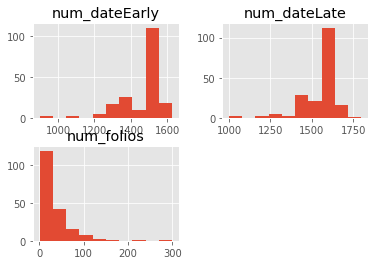

In [34]:
df.hist() # make a histogram of all numeric columns.

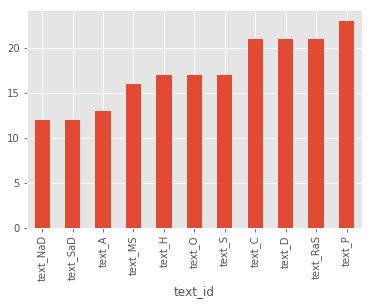

In [33]:
df.groupby('text_id').count().sort_values(by = 'shelfmark_id')['shelfmark_id'].plot.bar()

### Comparing Manuscript Text Length and Date

Since recent additions to the database has made analyses involving manuscript witness dates and folio spans more feasible, I tested eleven scatterplots looking at the relation between text length and earliest suspected creation date for each of the eleven Little Astronomy Texts.

Because we are interested in this set of texts as a collection, the size of the dot is associated with the number of Little Astronomy texts present in that particular manuscript.

Length of On Nights and Days in ms witnesses across the centuries


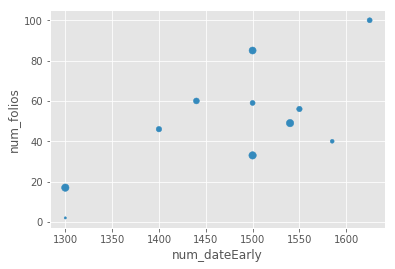

In [74]:
sql_NaD = sql + """

AND `msTexts-to-folio`.text_id = 'text_NaD'
"""

with connection.cursor() as cursor:

    cursor.execute(sql_NaD)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df_NaD = pd.DataFrame(result, columns = names)

print("Length of On Nights and Days in ms witnesses across the centuries")
df_NaD.dropna(subset=['num_dateEarly','num_folios','number_LA']).plot.scatter(x = 'num_dateEarly', y = 'num_folios', s=(df_NaD.number_LA*5))


Length of On Sizes and Distances in ms witnesses across the centuries


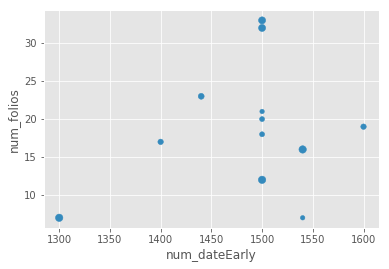

In [96]:

sql_SaD = sql + """


AND `msTexts-to-folio`.text_id = 'text_SaD'
"""

with connection.cursor() as cursor:

    cursor.execute(sql_SaD)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df_SaD = pd.DataFrame(result, columns = names)

print("Length of On Sizes and Distances in ms witnesses across the centuries")
df_SaD.dropna(subset=['num_dateEarly','num_folios','number_LA']).plot.scatter(x = 'num_dateEarly', y = 'num_folios', s=(df_SaD.number_LA*5))


Length of the Anaphoricus in ms witnesses across the centuries


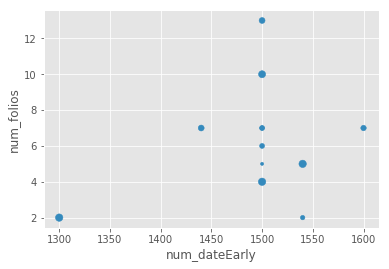

In [95]:
sql_A = sql + """

AND `msTexts-to-folio`.text_id = 'text_A'
"""

with connection.cursor() as cursor:

    cursor.execute(sql_A)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df_A = pd.DataFrame(result, columns = names)

print("Length of the Anaphoricus in ms witnesses across the centuries")
df_A.dropna(subset=['num_dateEarly','num_folios','number_LA']).plot.scatter(x = 'num_dateEarly', y = 'num_folios', s=(df_A.number_LA*5))


Length of On the Moving Sphere in ms witnesses across the centuries


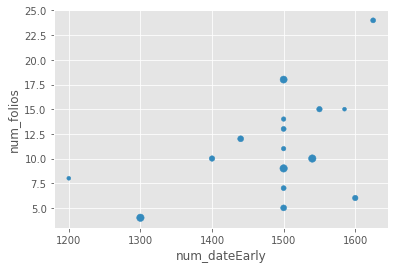

In [94]:
sql_MS = sql + """

AND `msTexts-to-folio`.text_id = 'text_MS'
"""

with connection.cursor() as cursor:

    cursor.execute(sql_MS)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df_MS = pd.DataFrame(result, columns = names)

print("Length of On the Moving Sphere in ms witnesses across the centuries")
df_MS.dropna(subset=['num_dateEarly','num_folios','number_LA']).plot.scatter(x = 'num_dateEarly', y = 'num_folios', s=(df_MS.number_LA*5))


Length of On Habitations in ms witnesses across the centuries


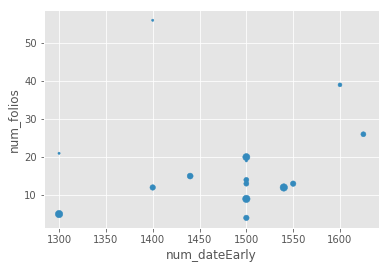

In [93]:
sql_H = sql + """

AND `msTexts-to-folio`.text_id = 'text_H'
"""

with connection.cursor() as cursor:

    cursor.execute(sql_H)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df_H = pd.DataFrame(result, columns = names)

print("Length of On Habitations in ms witnesses across the centuries")
df_H.dropna(subset=['num_dateEarly','num_folios','number_LA']).plot.scatter(x = 'num_dateEarly', y = 'num_folios', s=(df_H.number_LA*5))


Length of the Optics in ms witnesses across the centuries


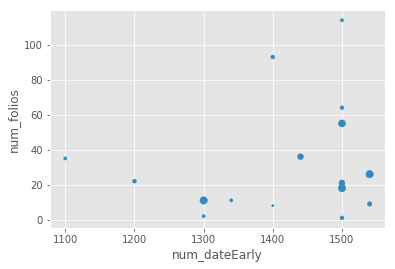

In [92]:
sql_O = sql + """

AND `msTexts-to-folio`.text_id = 'text_O'
"""

with connection.cursor() as cursor:

    cursor.execute(sql_O)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df_O = pd.DataFrame(result, columns = names)

print("Length of the Optics in ms witnesses across the centuries")
df_O.dropna(subset=['num_dateEarly','num_folios','number_LA']).plot.scatter(x = 'num_dateEarly', y = 'num_folios', s=(df_O.number_LA*5))


Length of the Sphaerica in ms witnesses across the centuries


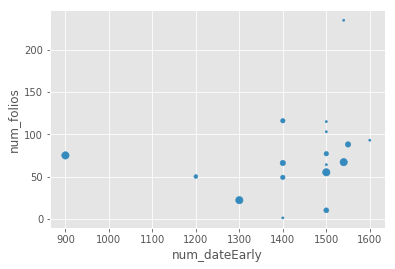

In [91]:
sql_S = sql + """

AND `msTexts-to-folio`.text_id = 'text_S'
"""

with connection.cursor() as cursor:

    cursor.execute(sql_S)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df_S = pd.DataFrame(result, columns = names)

print("Length of the Sphaerica in ms witnesses across the centuries")
df_S.dropna(subset=['num_dateEarly','num_folios','number_LA']).plot.scatter(x = 'num_dateEarly', y = 'num_folios', s=(df_S.number_LA*5))


Length of the Catoptrica in ms witnesses across the centuries


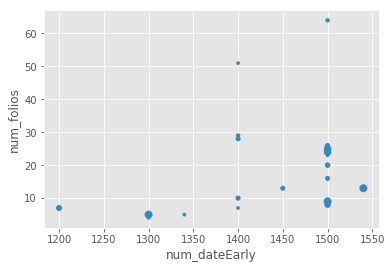

In [90]:
sql_C = sql + """

AND `msTexts-to-folio`.text_id = 'text_C'
"""

with connection.cursor() as cursor:

    cursor.execute(sql_C)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df_C = pd.DataFrame(result, columns = names)

print("Length of the Catoptrica in ms witnesses across the centuries")
df_C.dropna(subset=['num_dateEarly','num_folios','number_LA']).plot.scatter(x = 'num_dateEarly', y = 'num_folios', s=(df_C.number_LA*5))


Length of the Data in ms witnesses across the centuries


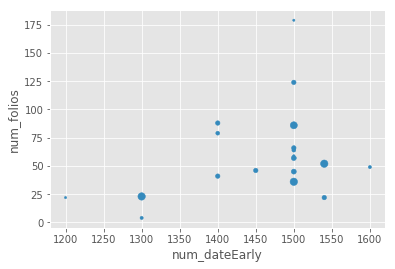

In [89]:
sql_D = sql + """

AND `msTexts-to-folio`.text_id = 'text_D'
"""

with connection.cursor() as cursor:

    cursor.execute(sql_D)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df_D = pd.DataFrame(result, columns = names)

print("Length of the Data in ms witnesses across the centuries")
df_D.dropna(subset=['num_dateEarly','num_folios','number_LA']).plot.scatter(x = 'num_dateEarly', y = 'num_folios', s=(df_D.number_LA*5))


Length of On Risings and Settings in ms witnesses across the centuries


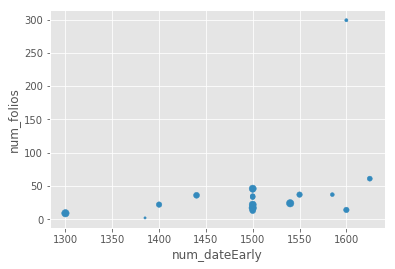

In [86]:
sql_RaS = sql + """

AND `msTexts-to-folio`.text_id = 'text_RaS'
"""

with connection.cursor() as cursor:

    cursor.execute(sql_RaS)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df_RaS = pd.DataFrame(result, columns = names)

print("Length of On Risings and Settings in ms witnesses across the centuries")
df_RaS.dropna(subset=['num_dateEarly','num_folios','number_LA']).plot.scatter(x = 'num_dateEarly', y = 'num_folios', s=(df_RaS.number_LA*5))


Length of the Phaenomena in ms witnesses across the centuries


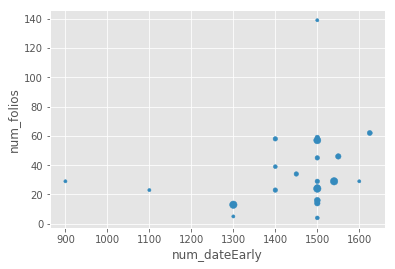

In [85]:
sql_P = sql + """

AND `msTexts-to-folio`.text_id = 'text_P'
"""

with connection.cursor() as cursor:

    cursor.execute(sql_P)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df_P = pd.DataFrame(result, columns = names)

print("Length of the Phaenomena in ms witnesses across the centuries")
df_P.dropna(subset=['num_dateEarly','num_folios','number_LA']).plot.scatter(x = 'num_dateEarly', y = 'num_folios', s=(df_P.number_LA*5))


Curiously, in most cases the 16th century texts (those whose earliest start dates are 1500) tended to fill a greater number of folios/pages.

These output tables are only preliminary ones: a fuller analysis would take into account how complete each witness is. Several manuscripts of the *Sphaerica* for example contain only one book out of three. Such information unfortunately is not consistently available from Pinakes, but an investigation into the manuscript descriptions in the critical editions and into those manuscripts available to me can aid in filling in this information.

These tables do suggest that there are several 16th century manuscripts containing many Little Astronomy texts either on smaller folios or in a more spacious hand, since an outlier very often appears here. It appears this happens in more than one manuscript, since although the outlier appears several times in the above tables, it is marked by a small dot indicating a smaller number of Little Astronomy texts present in that manuscript.

Otherwise some things are to be expected, such as the *Sphaerica* generally taking up the largest amount of folios (it is in three books and the larger of the Little Astronomy texts), but we also can spot unexpected results, such as the curious instance of the manuscript witness of *On Risings and Settings* that fills around 300 pages.

In [65]:
connection.commit()
connection.close()